In [290]:
!pip install yfinance
!pip install git+https://github.com/dcajasn/Riskfolio-Lib.git
!pip install PyPortfolioOpt

#Faut changer notre version de numpy et pandas, pour l'avant dernière
!pip install Numpy==1.23.5
!pip install pandas==1.3.2



  Cloning https://github.com/dcajasn/Riskfolio-Lib.git to /private/var/folders/k5/ktrf3j117gs1ppk87tw6dxbc0000gn/T/pip-req-build-wjgzg38e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for Riskfolio-Lib: filename=Riskfolio_Lib-4.4.2-cp38-cp38-macosx_10_14_x86_64.whl size=183430 sha256=7f6937f1aa0a3d51e9f9f07b33d6dd143054ddb9e1570400c0b9f8d589183200
  Stored in directory: /private/var/folders/k5/ktrf3j117gs1ppk87tw6dxbc0000gn/T/pip-ephem-wheel-cache-05dztspt/wheels/32/11/d0/056926a99810470e8134d20f48757fcc5180097befacd82dd8
Successfully built Riskfolio-Lib


In [292]:
pip install pandas_datareader

     |████████████████████████████████| 109 kB 1.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [293]:
pip install sklearn

    ERROR: Command errored out with exit status 1:
     command: /Users/remimailhot/opt/anaconda3/bin/python -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/k5/ktrf3j117gs1ppk87tw6dxbc0000gn/T/pip-install-5sjft5bd/sklearn/setup.py'"'"'; __file__='"'"'/private/var/folders/k5/ktrf3j117gs1ppk87tw6dxbc0000gn/T/pip-install-5sjft5bd/sklearn/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /private/var/folders/k5/ktrf3j117gs1ppk87tw6dxbc0000gn/T/pip-pip-egg-info-04qpm3iu
         cwd: /private/var/folders/k5/ktrf3j117gs1ppk87tw6dxbc0000gn/T/pip-install-5sjft5bd/sklearn/
    Complete output (18 lines):
    The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
    rather than 'sklearn' for pip commands.
    
    Here is how to fix this error in the main use cases:
    - use 'pip install scikit-learn' rather than 'p

In [1]:
run data.py

[*********************100%%**********************]  11 of 11 completed


In [2]:
run tp3_sam.py

[*********************100%%**********************]  11 of 11 completed


## Time series of the Indexes and the ETFs

#### Time Series plot grid of the monthly historical returns of the ETF's benchmark Index 

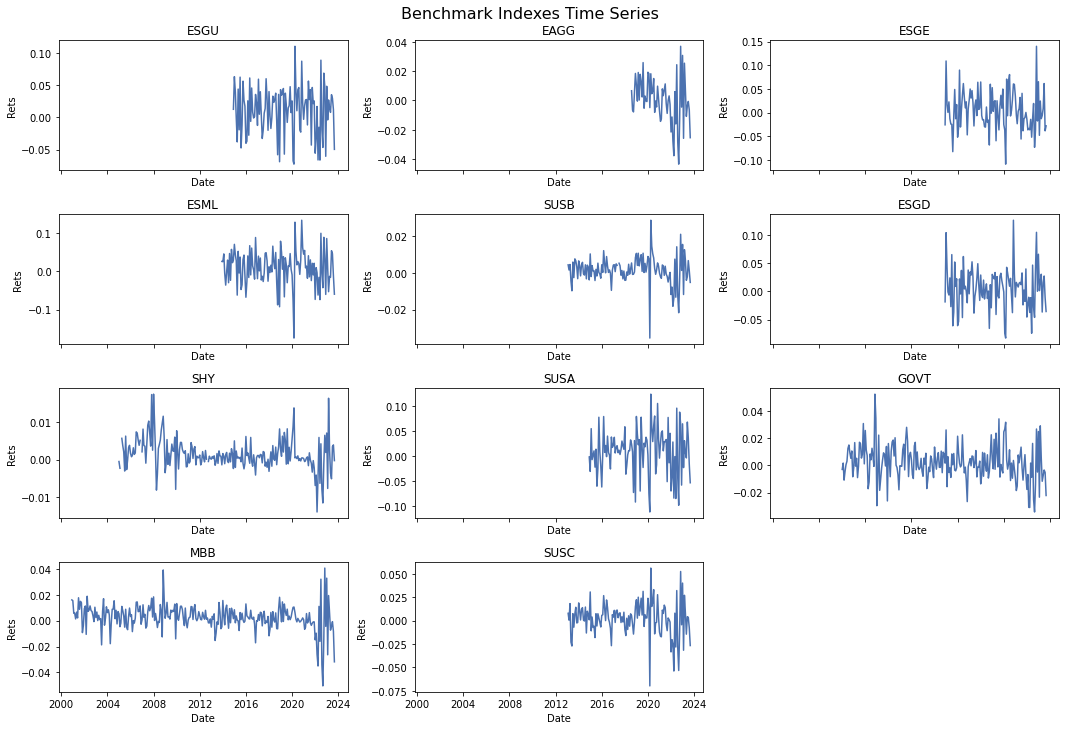

In [301]:
plot_time_series_grid(df_index_rets, title='Benchmark Indexes Time Series',  y_axis_label="Rets" )

#### Time Series plot grid of the ETF's historical monthly returns

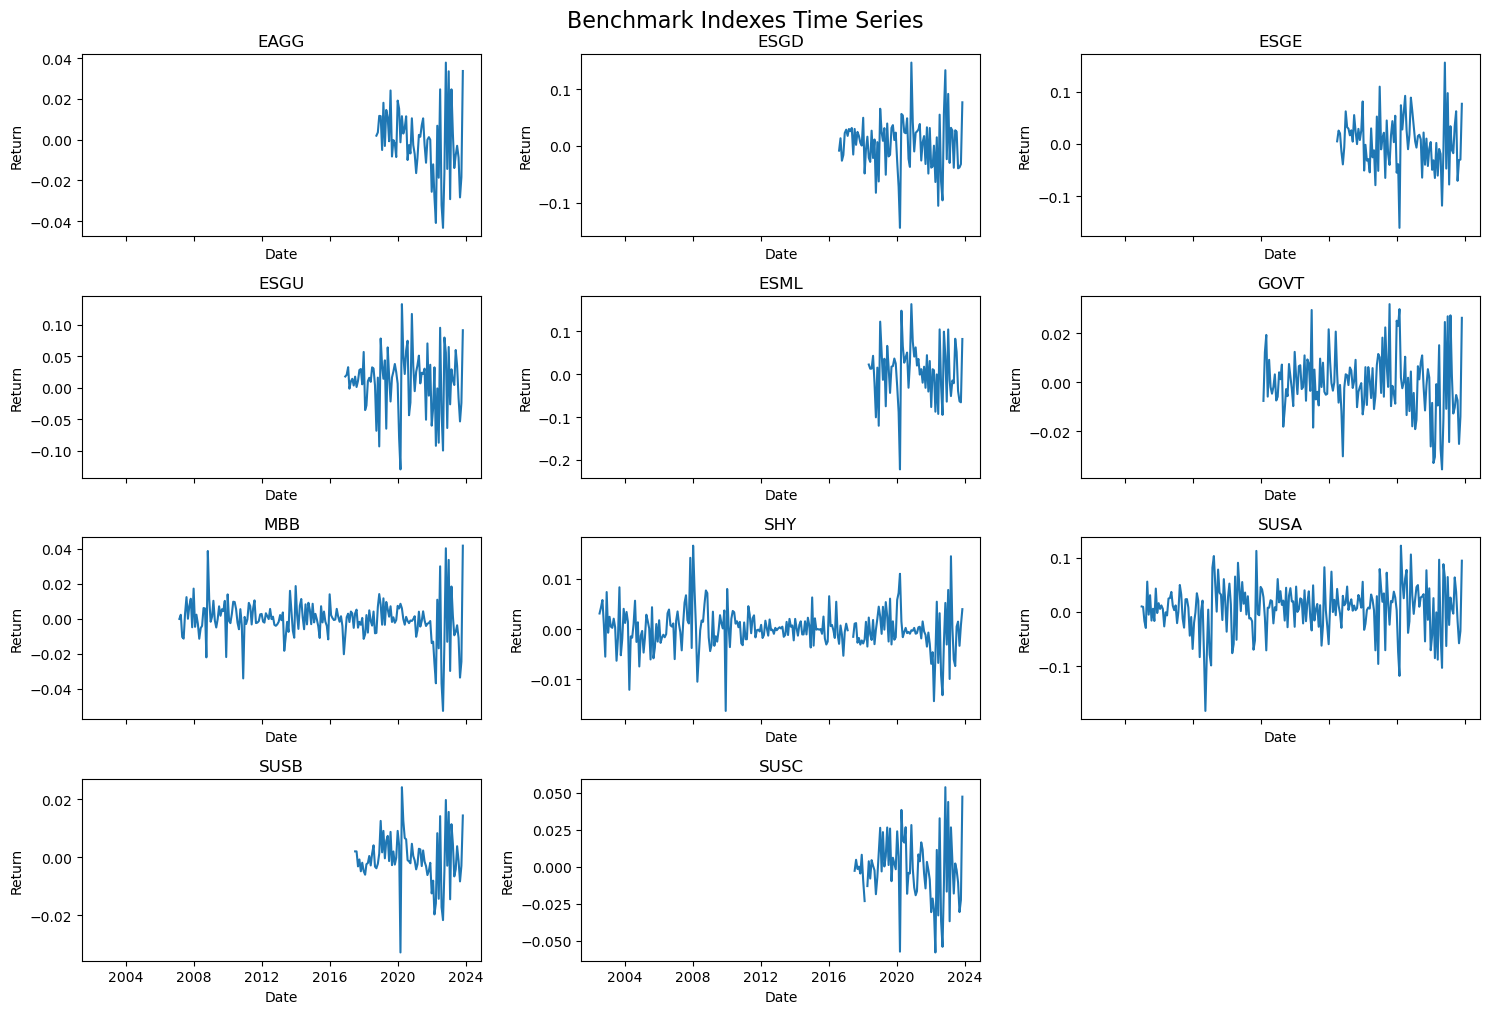

In [3]:
plot_time_series_grid(etf_monthly_rets)

## Tracking error between ETF's and associated benchmark Index 

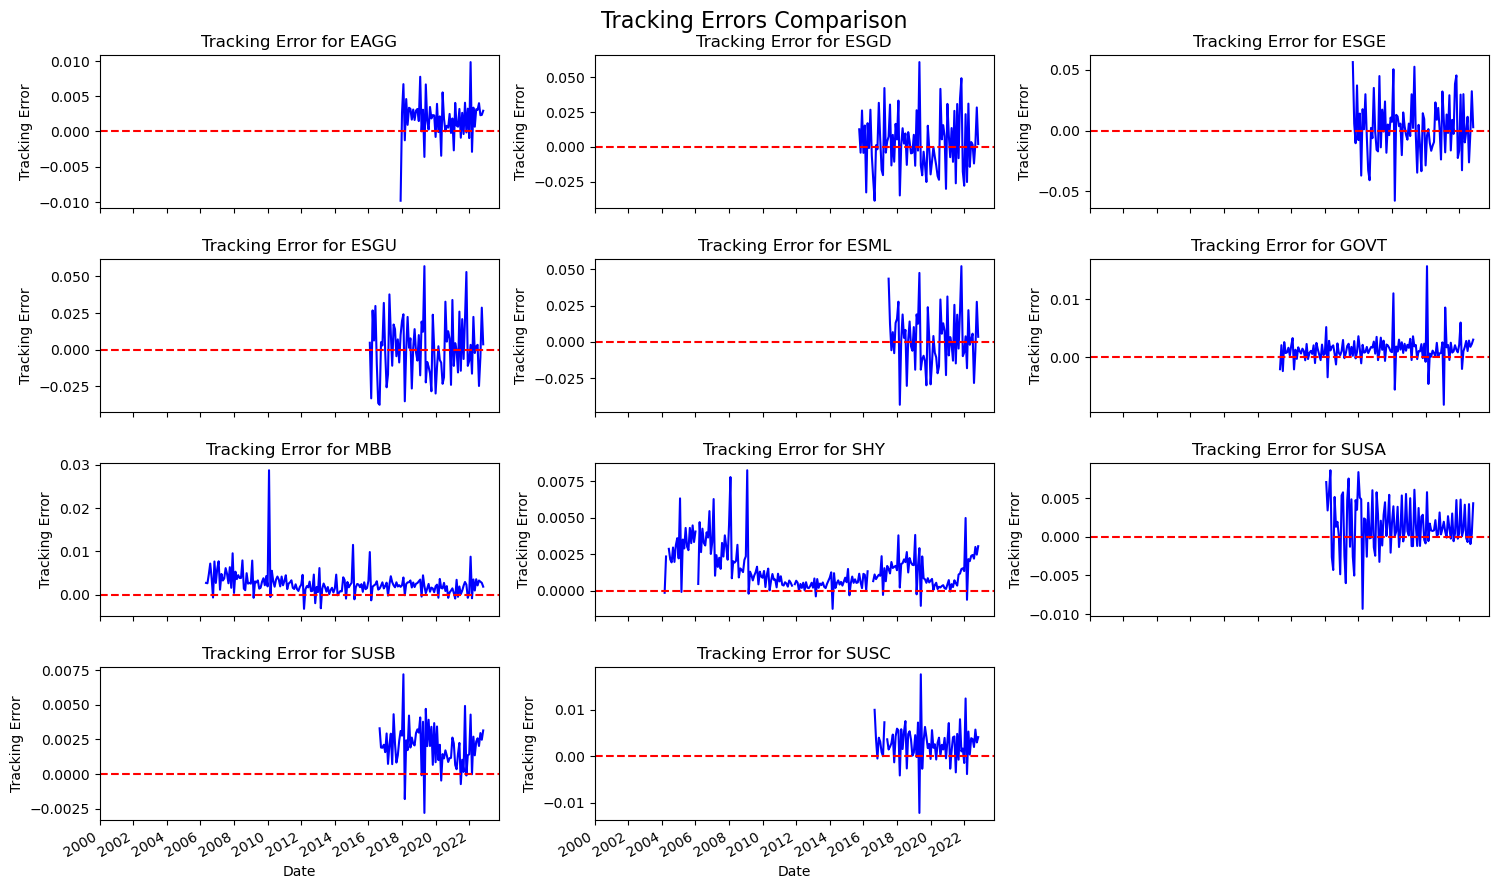

In [4]:
TE_fct(df_index_rets, etf_monthly_rets)

# Imputing data to index dataframe

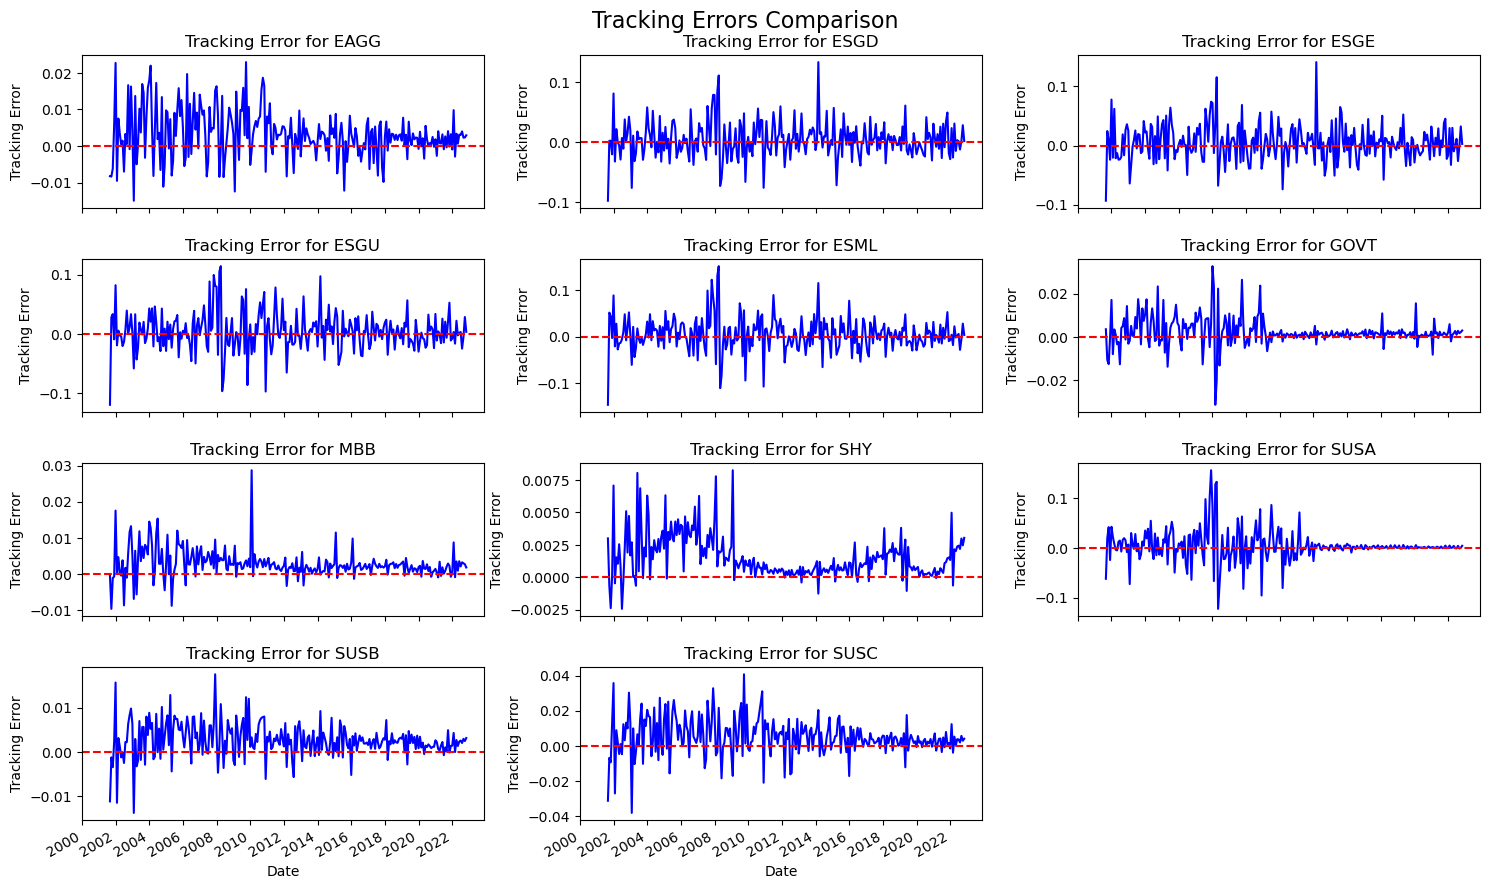

In [5]:
TE_fct(df_imputed_index, df_imputed_etf)

## Input Data Analysis 

#### correlation analysis of the historical monthly returns of the ETF's benchmark index 

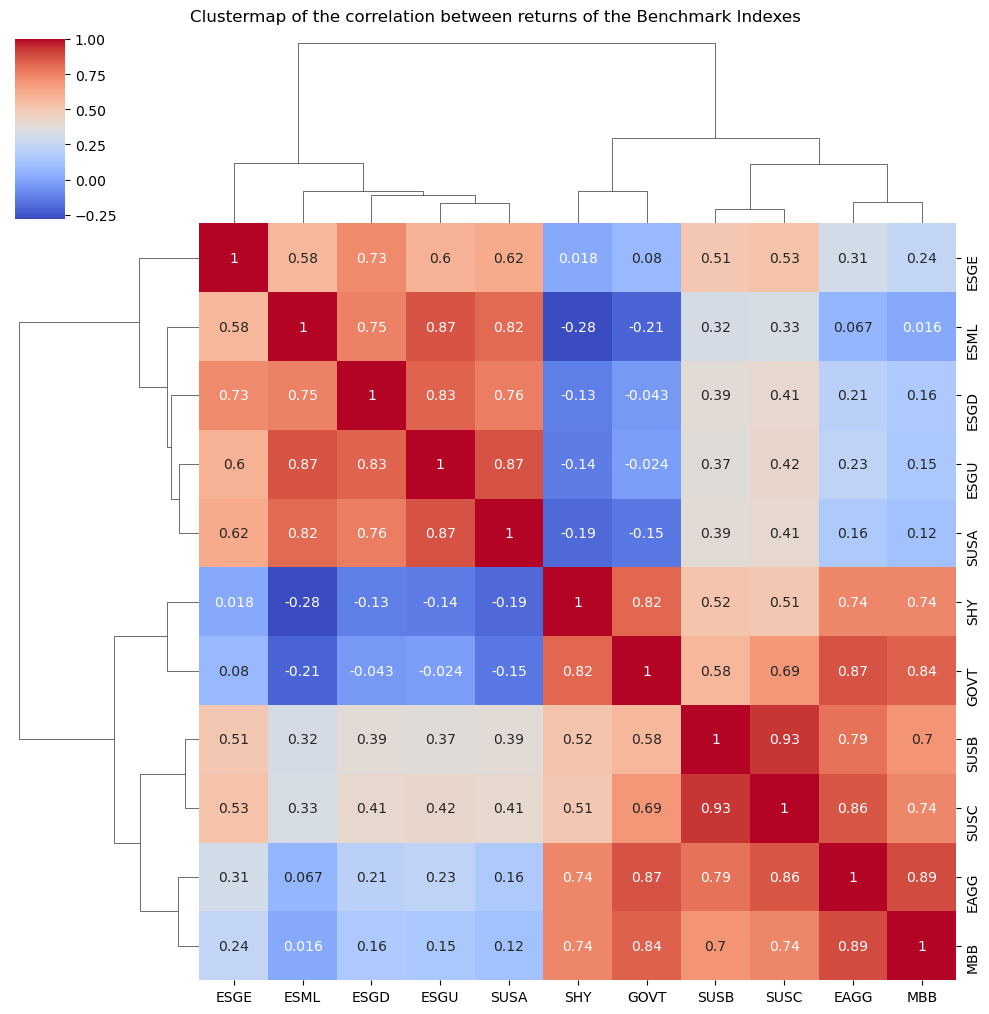

In [6]:
# Clustermap of correlation of benchmark indexes returns
imputed_index_corr = pd.DataFrame(df_imputed_index).corr()
sns.clustermap(imputed_index_corr, annot=True, square=True, cmap='coolwarm')
plt.suptitle('Clustermap of the correlation between returns of the Benchmark Indexes').set_y(1.01)

plt.show();

#### histograms of the Indexes monthly returns 


ESGU
count    275.000000
mean       0.010536
std        0.029195
min       -0.072736
25%       -0.006207
50%        0.015238
75%        0.028516
max        0.110611
Name: ESGU, dtype: float64
Average spread of the benchmark index: 0.18334701034632206
Maximum spread of the benchmark index: 0.18334701034632206
Skewness of the benchmark index: -0.38463261225442436 
Kurtosis of the benchmark index: 0.6260791748998535 

EAGG
count    275.000000
mean       0.003158
std        0.010534
min       -0.043401
25%       -0.001781
50%        0.002470
75%        0.010038
max        0.036925
Name: EAGG, dtype: float64
Average spread of the benchmark index: 0.08032620818975811
Maximum spread of the benchmark index: 0.08032620818975811
Skewness of the benchmark index: -0.6374636817926369 
Kurtosis of the benchmark index: 2.117682517894254 

ESGE
count    275.000000
mean       0.006248
std        0.030828
min       -0.108789
25%       -0.013048
50%        0.007191
75%        0.024655
max        0.140001

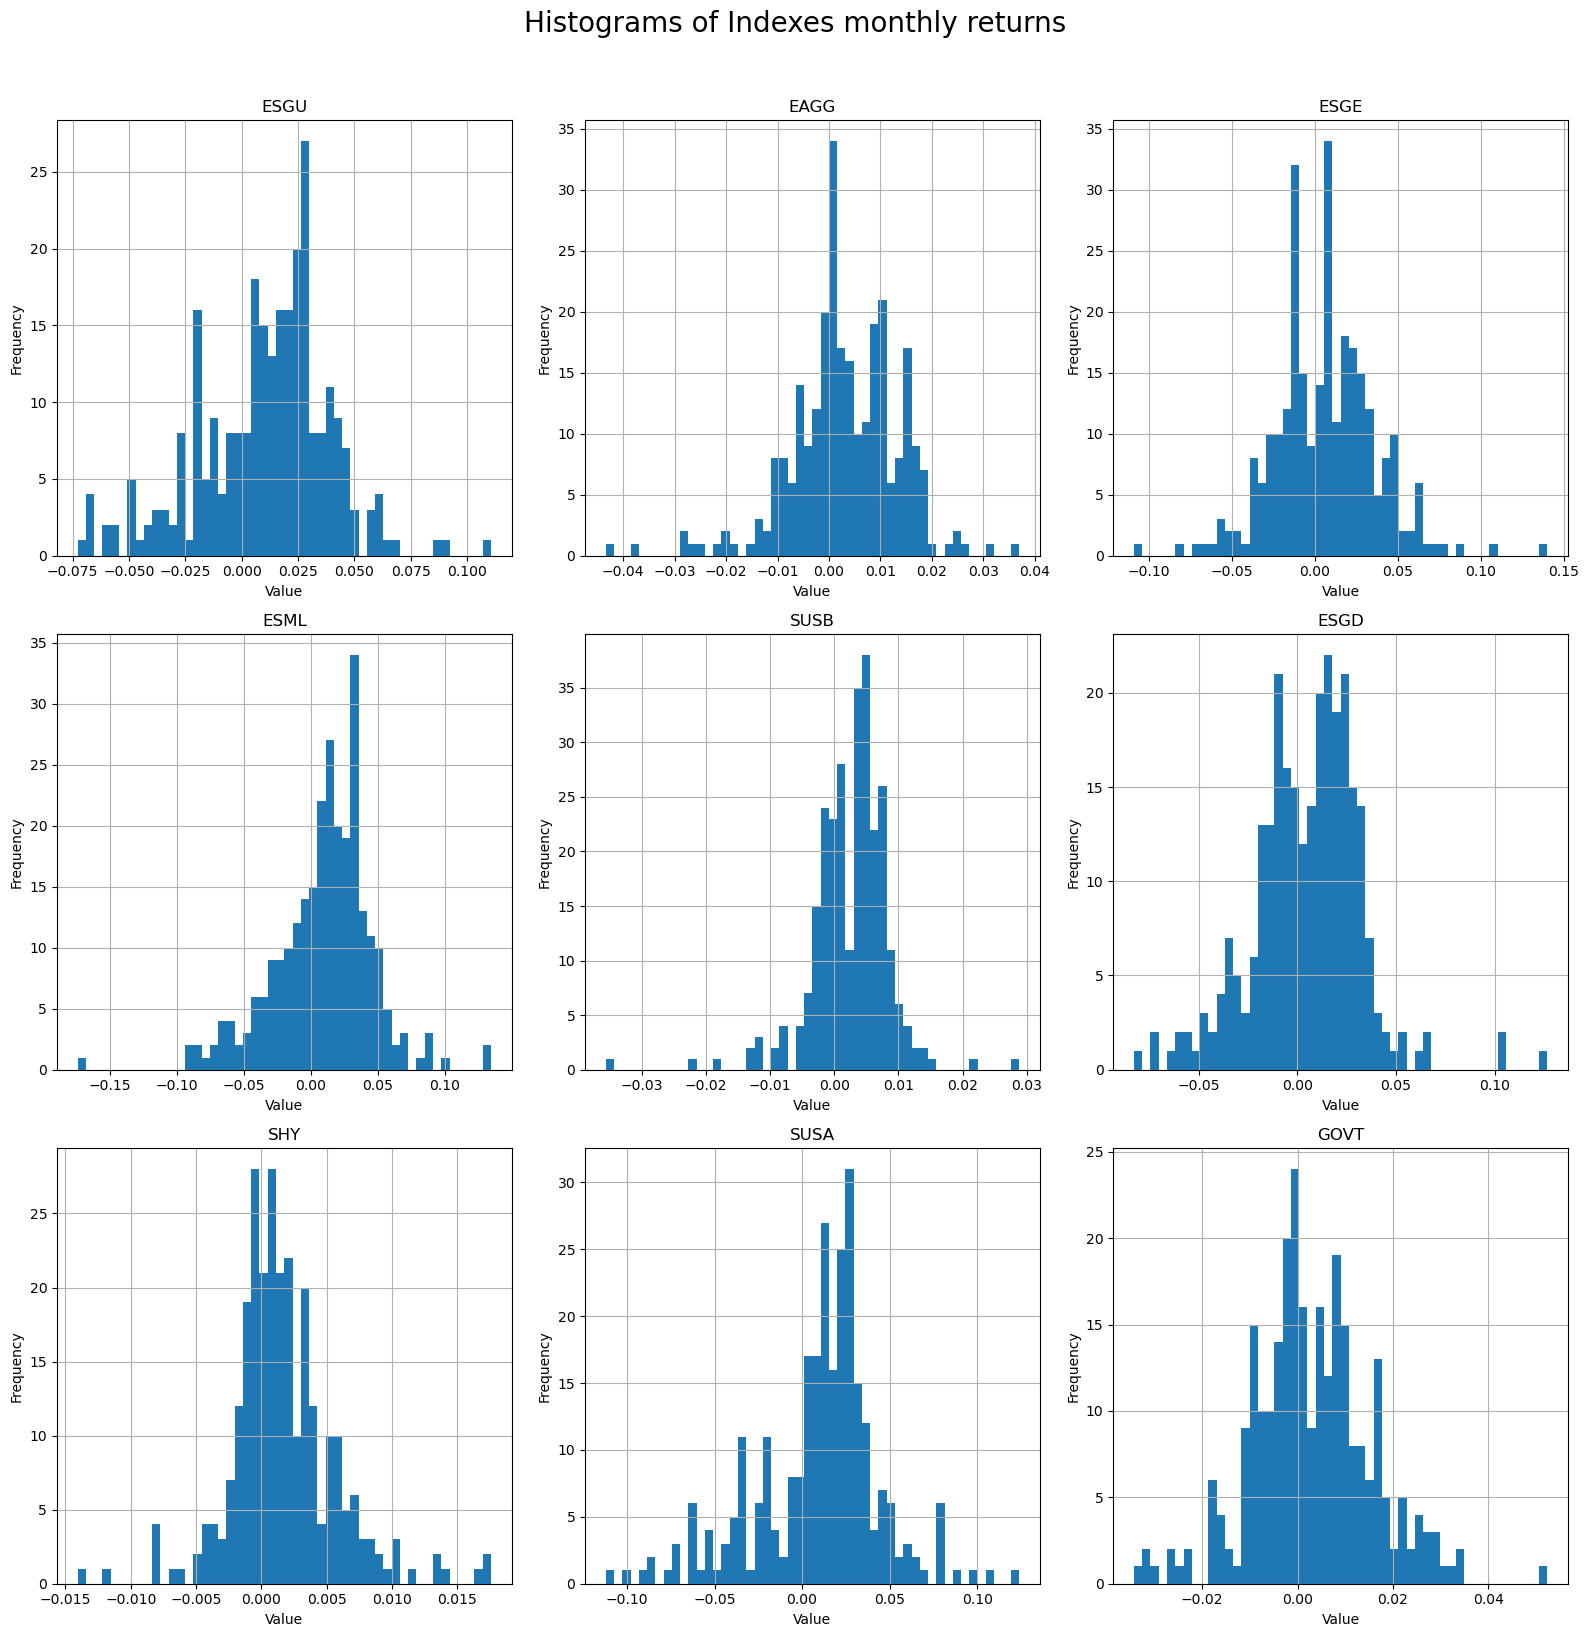

In [13]:

# Get the list of all column names
columns = df_imputed_index.columns

# Determine the number of rows and columns for the grid
num_rows = 3
num_cols = 3

# Create a figure and subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(16, 16))
fig.suptitle("Histograms of Indexes monthly returns", fontsize=20).set_y(1.02)

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Loop through the columns and plot histograms
for i, column in enumerate(columns):
    if i >= num_rows * num_cols:
        break  # Exit the loop if you exceed the number of subplots
    
    ax = axs[i]
    df_imputed_index[column].hist(ax=ax, bins=50)  # You can adjust the number of bins as needed
    ax.set_title(column)
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")
    print(f'\033[1m{column}\033[0m')
    print(df_imputed_index[column].describe())
    print(f'Average spread of the benchmark index: {np.mean(df_imputed_index[column].max()-df_imputed_index[column].min())}')
    print(f'Maximum spread of the benchmark index: {np.max(df_imputed_index[column].max()-df_imputed_index[column].min())}')
    print(f'Skewness of the benchmark index: {np.mean(skew(df_imputed_index[column][:], nan_policy="omit"))} ')
    print(f'Kurtosis of the benchmark index: {np.mean(kurtosis(df_imputed_index[column][:], nan_policy="omit"))} ')
    print('', sep='\n')

    # Hide any empty subplots if there are more subplots than columns
    for i in range(len(columns), num_rows * num_cols):
        fig.delaxes(axs[i])

# Adjust layout
plt.tight_layout()
plt.show()



## Machine learning methods to predict next month return
* Random Forest 
* Regression Tree

#### Features historical values analysis 

**Bonds**
 
- **BAMLCC0A0CMTRIV**: ICE BofA US Corporate Index Total Return Index Value <br>
- **BAMLC0A4CBBB**: ICE BofA BBB US Corporate Index Option-Adjusted Spread  <br>
- **BAMLC0A3CA**: ICE BofA Single-A US Corporate Index Option-Adjusted Spread  <br>
- **HQMCB10YR**: 10-Year High Quality Market (HQM) Corporate Bond Spot Rate <br>
- **FEDFUNDS**: Federal Funds Effective Rate <br>
- **T10Y2Y**: 10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity <br>
- **TB3SMFFM**: 3-Month Treasury Bill Minus Federal Funds Rate <br>
- **T5YFF**: 5-Year Treasury Constant Maturity Minus Federal Funds Rate <br>
- **T1YFF**: 1-Year Treasury Constant Maturity Minus Federal Funds Rate <br>
- **DLTIIT**: Treasury Long-Term Average (Over 10 Years), Inflation-Indexed <br>


**Equity Indexes**
- **NASDAQCOM**: NASDAQ Composite Index<br>
- **WILL5000PR**: Wilshire 5000 Price Index<br>
- **WILLLRGCAP**: Wilshire US Large-Cap Total Market<br>
- **WILLSMLCAP**: Wilshire US Small-Cap Total Market Index<br>
- **WILLLRGCAPGR**: Wilshire US Large-Cap Growth Total Market Index<br>
- **WILLLRGCAPVAL**: Wilshire US Large-Cap Value Total Market Index<br>
- **WILLMIDCAP**: Wilshire US Mid-Cap Total Market Index<br>
- **SBPREUE**: S&P Europe LargeMidCap <br>
- **MXEUMC**: MSCI Europe Mid Cap Index (USD)<br>
- **MXEULC**: MSCI Europe Large Cap Index (USD)<br>
- **SPAXLCUP**: S&P Pan Asia Ex-JP, AU, NZ, IN LargeCap Index<br>
- **SBPRAPU**: S&P Asia Pacific LargeMidCap<br>
- **MEMMG**: Morningstar Emerging Markets<br>
- **MXEF**: MSCI Emerging Markets Index<br>
- **MXEFLC**: MSCI Emerging Markets Large Cap Index (USD)<br>
- **MXEFMC**: MSCI Emerging Markets Mid Cap Index (USD)<br>
- **SML**: S&P SmallCap 600<br>


**Other**
- **MSPUS**: Median Sales Price of Houses Sold for the United States <br>
- **CCSA**: Continued Claims (Insured Unemployment) <br>
- **BOPGSTB**: Trade Balance: Goods and Services, Balance of Payments Basis<br>
- **VIXCLS**: CBOE Volatility Index: VIX<br>
- **USSLIND**: Leading Index for the United States<br>
- **USALOLITONOSTSAM**: Leading Indicators OECD: Leading Indicators: Composite Leading Indicator: Normalised for United States<br>
- **UNRATE**: Unemployment Rate<br>
- **STICKCPIM157SFRBATL**: Sticky Price Consumer Price Index less Food and Energy       <br>
- **EMVMACROBUS**: Equity Market Volatility Tracker: Macroeconomic News and Outlook: Business Investment And Sentiment<br>
- **MORTGAGE30US**: 30-Year Fixed Rate Mortgage Average in the United States<br>
- **WILLRESIPR**: Wilshire US Real Estate Securities Price Index (Wilshire US RESI)<br>



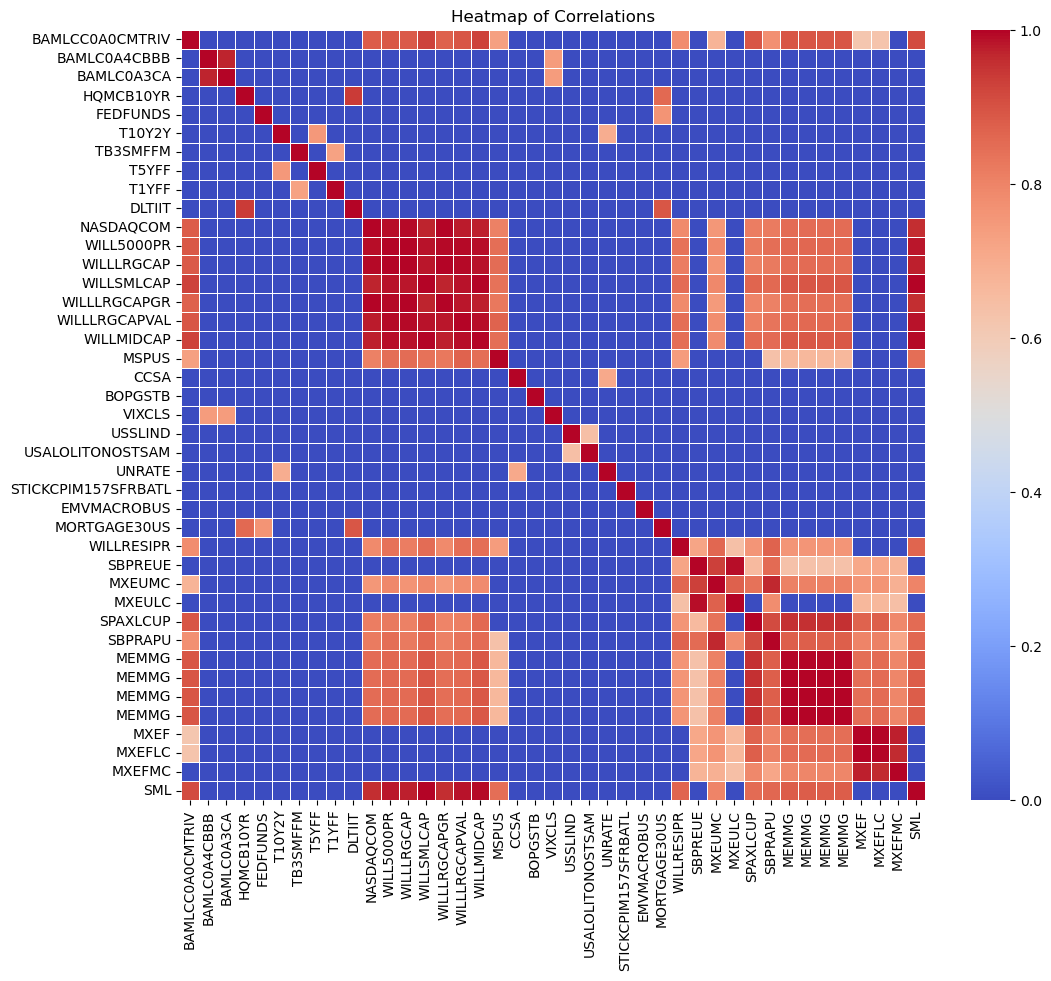

In [15]:
# Set a threshold for correlation
x_corr = pd.DataFrame(x).corr()
threshold = 0.6
x_corr[x_corr < threshold] = 0

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(x_corr, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of Correlations')
plt.show()

We can notice some strong correlations levels are observable among the historical features values. This makes sense since we do expect indeed that interest rate measure move together. This is also true for total market equity indexes used such as S&P500, Wilshire 1000, Wildshire total market, etc.  The following table describe the feature associated with the tick presented in the clustermap. 

## Random Forest

Average Mean Absolute Error using 5-fold cross-validation - Random Forest

Average Mean Absolute Error for ESGU: 0.02491692276152595
Average Mean Absolute Error for EAGG: 0.0076381415521553945
Average Mean Absolute Error for ESGE: 0.024727189580460045
Average Mean Absolute Error for ESML: 0.0284861399202035
Average Mean Absolute Error for SUSB: 0.004109291462465274
Average Mean Absolute Error for ESGD: 0.0221311252723894
Average Mean Absolute Error for SHY: 0.002653465899955376
Average Mean Absolute Error for SUSA: 0.027989104736022247
Average Mean Absolute Error for GOVT: 0.010012160199754722
Average Mean Absolute Error for MBB: 0.00627151317906794
Average Mean Absolute Error for SUSC: 0.010697132512980012


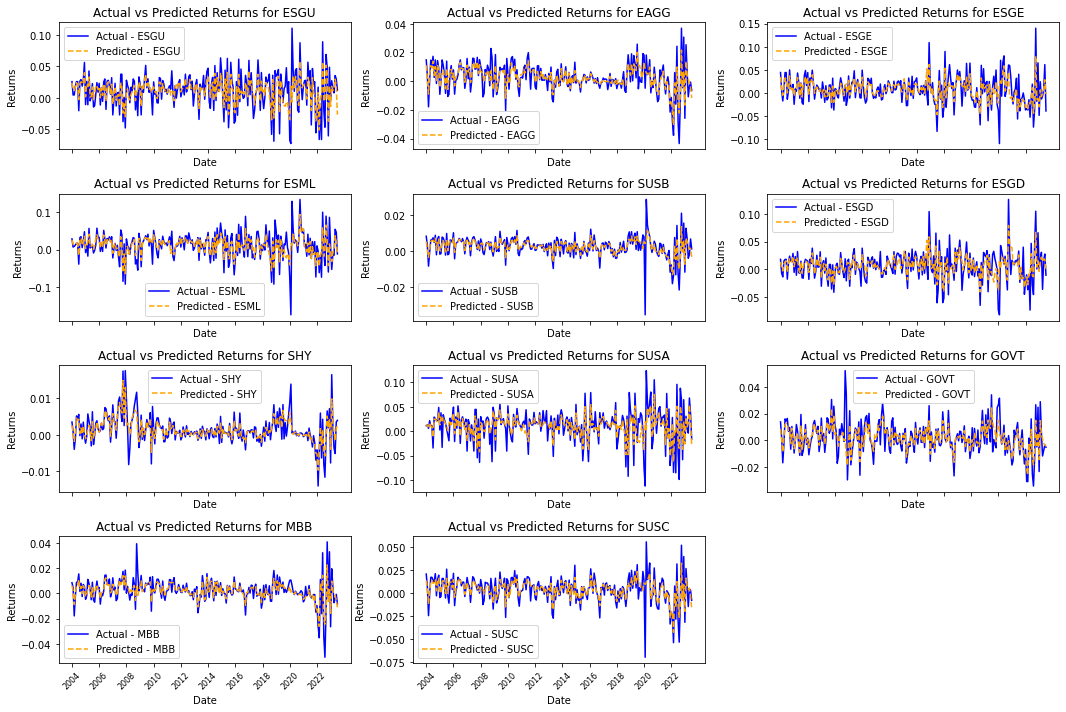

In [6]:
# Number of folds for cross-validation
num_folds = 5

# Create a grid for subplots
num_rows = 4
num_cols = 3
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10), sharex=True)

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()
years = time_serie_plot.str[:4]

print(f'Average Mean Absolute Error using {num_folds}-fold cross-validation - \033[1mRandom Forest\033[0m')
print('', sep='/n')

# Iterate over each index
for i, ticker in enumerate(ticker_list):
    # Extract features and target variable for the current stock
    x = merged_df[features_list]
    y = merged_df[ticker]
    
    # Standardize features
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x)
    
    # K-fold cross-validation
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    
    # Initialize model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    
    # Lists to store evaluation metrics
    mae_list = []
    
    # Lists to store actual and predicted returns for plotting
    actual_returns_list = []
    predicted_returns_list = []
    
    # Iterate over folds
    for train_index, test_index in kf.split(x_scaled):
        X_train, X_test = x_scaled[train_index], x_scaled[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Model Training
        rf_model.fit(X_train, y_train)
        
        # Model Prediction
        y_pred = rf_model.predict(X_test)
        
        # Evaluate Model Performance
        mae = mean_absolute_error(y_test, y_pred)
        mae_list.append(mae)
        
        # Store actual and predicted returns for plotting
        actual_returns_list.extend(y_test)
        predicted_returns_list.extend(y_pred)
    
    # Calculate average MAE across folds for the current stock
    average_mae = sum(mae_list) / len(mae_list)
    print(f'Average Mean Absolute Error for {ticker}: {average_mae}')
    
    # Predict returns for the entire period
    predicted_returns = rf_model.predict(x_scaled)
    
    # Store predicted returns in the DataFrame
    predicted_returns_df[ticker] = predicted_returns

    # Plot the actual and predicted time series only if there is data
    if not y.empty:
        ax = axes[i]
        ax.plot(time_serie_plot, y, label=f'Actual - {ticker}', color='blue')
        ax.plot(time_serie_plot, predicted_returns, label=f'Predicted - {ticker}', linestyle='--', color='orange')
        ax.set_title(f'Actual vs Predicted Returns for {ticker}')
        ax.set_xlabel('Date')
        ax.set_ylabel('Returns')
        ax.legend()

        # Adjust x-axis labels
        ax.set_xticks(time_serie_plot[::24])  # Set x-axis ticks every 24 months
        ax.set_xticklabels(years[::24], rotation=45, fontsize=8)  # Set x-axis labels with every second year, rotated for better visibility

# Hide empty subplots if the number of subplots is less than the total number of subplots in the grid
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


## Regression Tree

Average Mean Absolute Error using {num_folds}-fold cross-validation - Regression Tree

Average Mean Absolute Error for ESGU: 0.03220926982036944
Average Mean Absolute Error for EAGG: 0.009831701917084759
Average Mean Absolute Error for ESGE: 0.03529745993422706
Average Mean Absolute Error for ESML: 0.03629265054270764
Average Mean Absolute Error for SUSB: 0.005346452206010157
Average Mean Absolute Error for ESGD: 0.03184655800077078
Average Mean Absolute Error for SHY: 0.0034254959570877547
Average Mean Absolute Error for SUSA: 0.03841441317768759
Average Mean Absolute Error for GOVT: 0.012838883884465562
Average Mean Absolute Error for MBB: 0.008727609017713606
Average Mean Absolute Error for SUSC: 0.01546950109564757


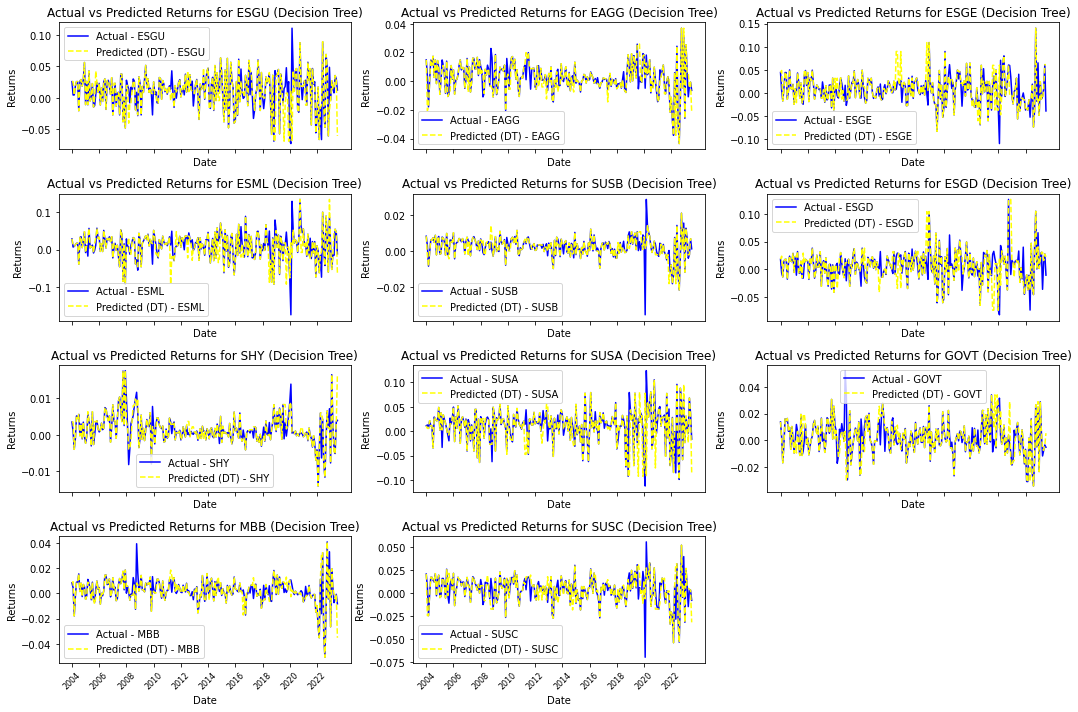

In [4]:
# Create a 4x3 grid for subplots for Decision Tree
fig_dt, axes_dt = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10), sharex=True)
axes_dt = axes_dt.flatten()
print('Average Mean Absolute Error using {num_folds}-fold cross-validation - \033[1mRegression Tree\033[0m')
print('', sep='/n')

for i, ticker in enumerate(ticker_list):
    # Initialize Decision Tree model
    dt_model = DecisionTreeRegressor(random_state=42)
    
    # Lists to store evaluation metrics
    mae_list_dt = []
    
    # Lists to store actual and predicted returns for plotting
    actual_returns_list_dt = []
    predicted_returns_list_dt = []
    
    # K-fold cross-validation for Decision Tree
    for train_index, test_index in kf.split(x_scaled):
        X_train, X_test = x_scaled[train_index], x_scaled[test_index]
        y_train, y_test = merged_df[ticker].iloc[train_index], merged_df[ticker].iloc[test_index]
        
        # Model Training for Decision Tree
        dt_model.fit(X_train, y_train)
        
        # Model Prediction for Decision Tree
        y_pred_dt = dt_model.predict(X_test)
        
        # Evaluate Model Performance
        mae_dt = mean_absolute_error(y_test, y_pred_dt)
        mae_list_dt.append(mae_dt)
        
        # Store actual and predicted returns for Decision Tree
        actual_returns_list_dt.extend(y_test)
        predicted_returns_list_dt.extend(y_pred_dt)
    
    # Calculate average MAE across folds for the current stock
    average_mae_dt = sum(mae_list_dt) / len(mae_list_dt)
    print(f'Average Mean Absolute Error for {ticker}: {average_mae_dt}')
    
    # Predict returns for the entire period using Decision Tree
    predicted_returns_dt = dt_model.predict(x_scaled)
    
    # Store predicted returns in the DataFrame for Decision Tree
    predicted_returns_df_dt[ticker] = predicted_returns_dt
    
    # Plot the actual and predicted time series for Decision Tree
    ax = axes_dt[i]
    ax.plot(time_serie_plot, merged_df[ticker], label=f'Actual - {ticker}', color='blue')
    ax.plot(time_serie_plot, predicted_returns_dt, label=f'Predicted (DT) - {ticker}', linestyle='--', color='yellow')
    ax.set_title(f'Actual vs Predicted Returns for {ticker} (Decision Tree)')
    ax.set_xlabel('Date')
    ax.set_ylabel('Returns')
    ax.legend()

    # Adjust x-axis labels
    ax.set_xticks(time_serie_plot[::24])  # Set x-axis ticks every 24 months
    ax.set_xticklabels(years[::24], rotation=45, fontsize=8)  # Set x-axis labels with every second year, rotated for better visibility

# Hide empty subplots if the number of subplots is less than the total number of subplots in the grid
for j in range(i + 1, len(axes_dt)):
    axes_dt[j].axis('off')

# Adjust layout for Decision Tree
plt.tight_layout()
plt.show()

## Monthly returns predictions 

The following Dataframes containt the monthly return predictions made by the respective machine learning method based on the previous month feature values. 

In [4]:
predicted_returns_df

,ESGU,EAGG,ESGE,ESML,SUSB,ESGD,SHY,SUSA,GOVT,MBB,SUSC
2004-02,0.023759,0.011044,0.034774,0.025551,0.005251,0.013183,0.002572,0.014297,0.008512,0.006183,0.014011
2004-03,0.014747,0.000641,0.009575,0.013796,0.001054,0.003354,0.000249,0.010084,0.000370,0.001876,0.005155
2004-04,0.011440,-0.008952,-0.004752,0.012909,-0.003608,-0.003166,-0.001836,0.009557,-0.008782,-0.008832,-0.011731
2004-05,0.017449,0.004958,0.013077,0.013061,0.000963,0.009442,0.000728,0.016874,0.002624,-0.000450,0.001701
2004-06,0.023912,0.010788,0.032556,0.017989,0.005418,0.012608,0.004583,0.010057,0.011851,0.006552,0.013814
...,...,...,...,...,...,...,...,...,...,...,...
2023-04,0.011572,0.004476,-0.007351,-0.005445,0.005400,0.021770,0.003082,0.008945,0.004809,0.002496,0.006819
2023-05,0.014035,0.001500,-0.001150,-0.000683,0.003021,0.013641,0.000942,0.016399,0.001058,-0.001104,0.004631
2023-06,0.029532,-0.001173,0.007178,0.037012,0.000941,0.018664,-0.001641,0.053662,-0.002226,-0.001678,0.005682
2023-07,0.017799,-0.003869,0.028717,0.020252,0.001471,0.017767,0.001615,0.020507,-0.003529,-0.005339,-0.002689


In [6]:
# Random forest predicted Monthly returns for each Index (ETF): 
predicted_returns_df

,ESGU,EAGG,ESGE,ESML,SUSB,ESGD,SHY,SUSA,GOVT,MBB,SUSC
2004-02,0.023759,0.011044,0.034774,0.025551,0.005251,0.013183,0.002572,0.014297,0.008512,0.006183,0.014011
2004-03,0.014747,0.000641,0.009575,0.013796,0.001054,0.003354,0.000249,0.010084,0.000370,0.001876,0.005155
2004-04,0.011440,-0.008952,-0.004752,0.012909,-0.003608,-0.003166,-0.001836,0.009557,-0.008782,-0.008832,-0.011731
2004-05,0.017449,0.004958,0.013077,0.013061,0.000963,0.009442,0.000728,0.016874,0.002624,-0.000450,0.001701
2004-06,0.023912,0.010788,0.032556,0.017989,0.005418,0.012608,0.004583,0.010057,0.011851,0.006552,0.013814
...,...,...,...,...,...,...,...,...,...,...,...
2023-04,0.011572,0.004476,-0.007351,-0.005445,0.005400,0.021770,0.003082,0.008945,0.004809,0.002496,0.006819
2023-05,0.014035,0.001500,-0.001150,-0.000683,0.003021,0.013641,0.000942,0.016399,0.001058,-0.001104,0.004631
2023-06,0.029532,-0.001173,0.007178,0.037012,0.000941,0.018664,-0.001641,0.053662,-0.002226,-0.001678,0.005682
2023-07,0.017799,-0.003869,0.028717,0.020252,0.001471,0.017767,0.001615,0.020507,-0.003529,-0.005339,-0.002689


## Historical Monthly returns 

In [7]:
# Filled Index monthly returns used as proxy of the ETF 
df_imputed_index

,ESGU,EAGG,ESGE,ESML,SUSB,ESGD,SHY,SUSA,GOVT,MBB,SUSC
Date,,,,,,,,,,,
2000-11,0.010743,0.000241,0.004480,0.009573,0.001533,0.005718,0.001469,0.009495,0.002078,0.002699,0.001814
2000-12,-0.020554,0.017336,-0.013169,-0.038916,0.007573,-0.018144,0.007726,-0.034266,0.022568,0.016101,0.014315
2001-01,-0.020554,0.017336,-0.013169,-0.038916,0.007573,-0.018144,0.005722,-0.034266,0.018901,0.015569,0.014315
2001-02,0.017133,0.010018,-0.012107,-0.001508,0.004769,-0.000799,0.001487,0.019849,0.005747,0.005726,0.010691
2001-03,0.017133,0.010018,-0.012107,-0.001508,0.004581,-0.000799,0.002067,0.019849,0.005772,0.005804,0.009856
...,...,...,...,...,...,...,...,...,...,...,...
2023-05,0.007790,-0.010849,-0.006359,-0.015336,-0.004040,-0.036580,-0.003642,-0.003863,-0.011722,-0.007327,-0.014471
2023-06,0.035321,-0.003571,0.008918,0.054402,-0.002137,0.015630,-0.005155,0.067937,-0.007496,-0.004266,0.004196
2023-07,0.029793,-0.000672,0.061386,0.046461,0.006721,0.027444,0.003486,0.036107,-0.003442,-0.000746,0.003532


# Remi's 

In [109]:
'''# Assuming your DataFrame is named df_imputed_index
# Assuming your index is a PeriodIndex

# Define the start and end dates
start_date = '2001-01'
end_date = '2014-02'

# Convert the start and end dates to Timestamp objects
start_date_timestamp = pd.Timestamp(start_date)
end_date_timestamp = pd.Timestamp(end_date)

# Create an empty list to store DataFrames
rets_list = []

# Set the fixed length of each DataFrame
window_size = 108

# Iterate through each period
current_date = start_date_timestamp
while current_date < end_date_timestamp:
    # Filter the DataFrame for the current month and maintain the fixed length
    rets = df_imputed_index[
        (df_imputed_index.index.to_timestamp() >= current_date)].iloc[:window_size]

    # Append the DataFrame to the list
    rets_list.append(rets.copy())

    # Move to the next month
    current_date += pd.DateOffset(months=1)

# Display the list of DataFrames
for i, rets_df in enumerate(rets_list):
    print(f"DataFrame {i + 1}:\n{rets_df}\n")'''


'# Assuming your DataFrame is named df_imputed_index\n# Assuming your index is a PeriodIndex\n\n# Define the start and end dates\nstart_date = \'2001-01\'\nend_date = \'2014-02\'\n\n# Convert the start and end dates to Timestamp objects\nstart_date_timestamp = pd.Timestamp(start_date)\nend_date_timestamp = pd.Timestamp(end_date)\n\n# Create an empty list to store DataFrames\nrets_list = []\n\n# Set the fixed length of each DataFrame\nwindow_size = 108\n\n# Iterate through each period\ncurrent_date = start_date_timestamp\nwhile current_date < end_date_timestamp:\n    # Filter the DataFrame for the current month and maintain the fixed length\n    rets = df_imputed_index[\n        (df_imputed_index.index.to_timestamp() >= current_date)].iloc[:window_size]\n\n    # Append the DataFrame to the list\n    rets_list.append(rets.copy())\n\n    # Move to the next month\n    current_date += pd.DateOffset(months=1)\n\n# Display the list of DataFrames\nfor i, rets_df in enumerate(rets_list):\n    p

## Build the linear constraint based on the minimum ESG rating of the portfolio

In [8]:
import pandas as pd
from riskfolio import factors_constraints

# Your DataFrame
ESG_constraint_data = {
    'ESG Fund Rating': [6.6, 8.6, 7.1, 7.3, 6.5, 5.7, 6, 5.7, 8.2, 7.9, 7.6],
}

ESG_constraint = pd.DataFrame(ESG_constraint_data)

# Define the constraints based on your DataFrame
constraints = pd.DataFrame({
    'Disabled': [False],
    'Factor': ['ESG Fund Rating'],
    'Sign': ['>='],
    'Value': [7],
    'Relative Factor': '',
})

# Create the factors constraints matrices C and D
C, D = factors_constraints(constraints, loadings=ESG_constraint)



## Min Variance ,Black Litterman and Efficient frontier optimization at each T

Create a ranking matrix of our prediction 

In [13]:
# Regression Tree predicted Monthly returns for each Index (ETF): 
predicted_returns_df

ranked_returns = predicted_returns_df.rank(axis=1, ascending=False, method='max')
ranked_returns

,ESGU,EAGG,ESGE,ESML,SUSB,ESGD,SHY,SUSA,GOVT,MBB,SUSC
2004-02,3.0,7.0,1.0,2.0,10.0,6.0,11.0,4.0,8.0,9.0,5.0
2004-03,1.0,9.0,4.0,2.0,8.0,6.0,11.0,3.0,10.0,7.0,5.0
2004-04,2.0,10.0,7.0,1.0,6.0,5.0,4.0,3.0,8.0,9.0,11.0
2004-05,1.0,6.0,3.0,4.0,9.0,5.0,10.0,2.0,7.0,11.0,8.0
2004-06,2.0,7.0,1.0,3.0,10.0,5.0,11.0,8.0,6.0,9.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
2023-04,2.0,7.0,11.0,10.0,5.0,1.0,8.0,3.0,6.0,9.0,4.0
2023-05,2.0,6.0,11.0,9.0,5.0,3.0,8.0,1.0,7.0,10.0,4.0
2023-06,3.0,8.0,5.0,2.0,7.0,4.0,9.0,1.0,11.0,10.0,6.0
2023-07,4.0,10.0,1.0,3.0,7.0,5.0,6.0,2.0,9.0,11.0,8.0


In [28]:
# Assuming you have initialized your DataFrames for minimum variance and Black Litterman results
monthly_min_variance = pd.DataFrame(columns=['Date', 'ESG Score'] + list(rets.columns))
monthly_bl_variance = pd.DataFrame(columns=['Date', 'ESG Score'] + list(rets.columns))
monthly_mu_cov_bl = []

# Define the start and end dates
start_date = '2010-01'
end_date = '2023-01'

# Convert the start and end dates to Timestamp objects
start_date_timestamp = pd.Timestamp(start_date)
end_date_timestamp = pd.Timestamp(end_date)

# Get relative ranking 
relative_ranking = ranked_returns.loc[start_date:]


asset_classes = {'Assets':["ESGU", "EAGG", "ESGE", "ESML", "SUSB", "ESGD", "SHY", "SUSA", "GOVT", "MBB", "SUSC"]}

asset_classes = pd.DataFrame(asset_classes)
asset_classes = asset_classes.sort_values(by=['Assets'])
# Create an empty dictionary to store efficient frontier results for each date
efficient_frontier_dict = {}


# Iterate over the rolling windows
while start_date_timestamp < end_date_timestamp:
    # Filter the DataFrame for the current month for minimum variance optimization

    rets_df = df_imputed_index[
        (df_imputed_index.index.to_timestamp() < start_date_timestamp) &
        (df_imputed_index.index.to_timestamp() >= start_date_timestamp - pd.DateOffset(months=108))
    ]

    # Building the portfolio object for minimum variance optimization
    port_min_variance = rp.Portfolio(returns=rets_df, ainequality=C, binequality=D, nea=6)

    # Select method and estimate input parameters for minimum variance optimization
    method_mu = 'hist'
    method_cov = 'hist'
    port_min_variance.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

    model_min_variance = 'Classic'
    rm_min_variance = 'MV'
    obj_min_variance = 'MinRisk'
    hist_min_variance = True
    rf_min_variance = 0
    l_min_variance = 0

    # Perform minimum variance optimization
    w_min_variance = port_min_variance.optimization(model=model_min_variance, rm=rm_min_variance, obj=obj_min_variance, rf=rf_min_variance, l=l_min_variance, hist=hist_min_variance)

    # Calculate the ESG Score for the minimum variance portfolio
    w_min_variance_weights = w_min_variance['weights'].values.reshape(1, -1)
    esg_ratings_min_variance = ESG_constraint['ESG Fund Rating'].values.reshape(-1, 1)
    ESG_Rating_portfolio_min_variance = w_min_variance_weights.dot(esg_ratings_min_variance).item()

    # Create a dictionary to store the results for the minimum variance portfolio
    result_dict_min_variance = {
        'Date': start_date_timestamp ,
        'ESG Score': ESG_Rating_portfolio_min_variance
    }

    # Add weights for each ETF to the dictionary
    result_dict_min_variance.update(dict(zip(rets.columns, w_min_variance['weights'].values)))

    # Append the results for the minimum variance portfolio to its own DataFrame
    monthly_min_variance = monthly_min_variance.append(result_dict_min_variance, ignore_index=True)

#########################################   BLACK-LITTERMAN  ###########################################

    # Extract top 2 and bottom 2 assets based on rankings for the specific date
    top_assets = relative_ranking.loc[start_date_timestamp].nsmallest(2).index
    bottom_assets = relative_ranking.loc[start_date_timestamp].nlargest(2).index



    # Create views with dynamic positions and relatives
    views = {
        'Disabled': [False, False],
        'Type': ['Assets', 'Assets'],
        'Set': ['', ''],
        'Position': [top_assets[0], top_assets[1]],
        'Sign': ['>=', '>='],
        'Return': [0.05, 0.05],  # Annual terms
        'Type Relative': ['Assets', 'Assets'],
        'Relative Set': ['', ''],
        'Relative': [bottom_assets[0], bottom_assets[1]]
    }

    views_df = pd.DataFrame(views)


    # Get the P, Q matrices from the views
    P, Q = rp.assets_views(views_df, asset_classes)

    # Estimate Black Litterman inputs for minimum variance portfolio
    port_min_variance.blacklitterman_stats(P, Q/12, rf=rf_min_variance, w=w_min_variance['weights'].to_frame(), delta=None, eq=True)

    model_bl_min_variance = 'BL'  # Black Litterman
    rm_bl_min_variance = 'MV'  # Risk measure used, this time will be variance
    obj_bl_min_variance = 'Sharpe'  # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
    hist_bl_min_variance = False  # Use historical scenarios for risk measures that depend on scenarios

    # Perform Black Litterman optimization for minimum variance portfolio
    w_bl_min_variance = port_min_variance.optimization(model=model_bl_min_variance, rm=rm_bl_min_variance, obj=obj_bl_min_variance, rf=rf_min_variance, l=l_min_variance, hist=hist_bl_min_variance)

    # Calculate the ESG Score for the Black Litterman portfolio
    w_bl_weights_min_variance = w_bl_min_variance['weights'].values.reshape(1, -1)
    esg_ratings_bl_min_variance = ESG_constraint['ESG Fund Rating'].values.reshape(-1, 1)
    ESG_Rating_portfolio_bl_min_variance = w_bl_weights_min_variance.dot(esg_ratings_bl_min_variance).item()

    # Create a dictionary to store the results for the Black Litterman portfolio
    result_dict_bl_min_variance = {
        'Date': start_date_timestamp,
        'ESG Score': ESG_Rating_portfolio_bl_min_variance
    }


    # Add weights for each ETF to the dictionary
    result_dict_bl_min_variance.update(dict(zip(rets.columns, w_bl_min_variance['weights'].values)))

    # Append the results for the Black Litterman portfolio to its own DataFrame
    monthly_bl_variance = monthly_bl_variance.append(result_dict_bl_min_variance, ignore_index=True)


    ######################## EFFICIENT FRONTIER ########################

    # Calculate and store efficient frontier results
    points = 5  # Number of points on the frontier
    frontier_weights = port_min_variance.efficient_frontier(model=model_bl_min_variance, rm=rm_bl_min_variance, points=points, rf=rf_min_variance, hist=hist_bl_min_variance).T

    # Create a dictionary to store the efficient frontier weights and ESG scores for the current date
    frontier_dict_for_date = {
        'Date': start_date_timestamp,
        'Points': []
    }

    # Iterate over each portfolio on the efficient frontier
    for i in range(points):
        # Calculate the ESG Score for the current portfolio
        w_weights = frontier_weights.iloc[i, :].values.reshape(1, -1)
        ESG_Rating_portfolio = w_weights.dot(esg_ratings_bl_min_variance).item()

        # Add the ESG Score and weights for each ETF to the dictionary
        portfolio_dict = {
            'Point': i + 1,  # Adding 1 to start indexing from 1
            'ESG Score': ESG_Rating_portfolio,
            'Weights': {ticker: weight for ticker, weight in zip(frontier_weights.columns[:], w_weights[0])}
        }

        frontier_dict_for_date['Points'].append(portfolio_dict)

    #  Now 'frontier_dict_for_date' contains the information for each point on the efficient frontier for the current date


        # Store mu_bl and cov_bl for later use
        mu_cov_bl = {
            'Date': start_date_timestamp,
            'mu_bl': port_min_variance.mu_bl.to_dict(orient = 'records')[0],
            'cov_bl': port_min_variance.cov_bl.to_dict(orient = 'records')
        }
        monthly_mu_cov_bl.append(mu_cov_bl)

    # Update the efficient_frontier_dict with the current date and efficient frontier information
    efficient_frontier_dict[start_date_timestamp] = frontier_dict_for_date




    # Update the start date for the next iteration
    start_date_timestamp += pd.DateOffset(months=1)



## Calculate the cumulative return of our portfolio according to the risk rolerance

In [29]:

Starting_point = '2012-01'
Ending_point = '2022-12'

# Select the relevant period in the returns DataFrame
#returns_period = etf_monthly_rets[(etf_monthly_rets.index >= Starting_point) & (etf_monthly_rets.index <= Ending_point)]

#If we want to backtest on imputed data for etf returns :
returns_period = df_imputed_index[(df_imputed_index.index >= Starting_point) & (df_imputed_index.index <= Ending_point)]

# Initialize an empty DataFrame to store the portfolio returns
portfolio_returns_bl = pd.DataFrame(columns=['Date', 'Portfolio_Return'])
portfolio_returns_mv = pd.DataFrame(columns=['Date', 'Portfolio_Return'])
portfolio_returns_1 = pd.DataFrame(columns=['Date', 'Portfolio_Return'])
portfolio_returns_2 = pd.DataFrame(columns=['Date', 'Portfolio_Return'])
portfolio_returns_3 = pd.DataFrame(columns=['Date', 'Portfolio_Return'])
portfolio_returns_4 = pd.DataFrame(columns=['Date', 'Portfolio_Return'])
portfolio_returns_5 = pd.DataFrame(columns=['Date', 'Portfolio_Return'])
portfolio_returns_eq_w = pd.DataFrame(columns=['Date', 'Portfolio_Return'])

# Iterate over each date in the period
for index, row in monthly_bl_variance.iterrows():
    # Extract the date and weights for the current row
    date = row['Date']
    weights = row.drop(['Date', 'ESG Score']).values

    # Check if the date is present in the returns_period DataFrame
    if date in returns_period.index:
        # Extract the returns for the current date
        returns_at_date = returns_period.loc[date]

        # Calculate the portfolio return for the current date
        portfolio_return_bl = np.dot(returns_at_date, weights)

        # Append the date and portfolio return to the DataFrame
        portfolio_returns_bl = portfolio_returns_bl.append({'Date': date, 'Portfolio_Return': portfolio_return_bl}, ignore_index=True)


# Iterate over each date in the period
for index, row in monthly_min_variance.iterrows():
    # Extract the date and weights for the current row
    date = row['Date']
    weights = row.drop(['Date', 'ESG Score']).values

    # Check if the date is present in the returns_period DataFrame
    if date in returns_period.index:
        # Extract the returns for the current date
        returns_at_date = returns_period.loc[date]

        # Calculate the portfolio return for the current date
        portfolio_return_mv = np.dot(returns_at_date, weights)

        # Append the date and portfolio return to the DataFrame
        portfolio_returns_mv = portfolio_returns_mv.append({'Date': date, 'Portfolio_Return': portfolio_return_mv}, ignore_index=True)






        # Extract the points and create a DataFrame
        points = efficient_frontier_dict[date]['Points']


        weights_1 = np.array(list(points[0]['Weights'].values()))
        weights_2 = np.array(list(points[1]['Weights'].values()))
        weights_3 = np.array(list(points[2]['Weights'].values()))
        weights_4 = np.array(list(points[3]['Weights'].values()))
        weights_5 = np.array(list(points[4]['Weights'].values()))

        # Calculate the portfolio return for the current date
        portfolio_return_1 = np.dot(returns_at_date, weights_1)
        # Calculate the portfolio return for the current date
        portfolio_return_2 = np.dot(returns_at_date, weights_2)
        # Calculate the portfolio return for the current date
        portfolio_return_3 = np.dot(returns_at_date, weights_3)
        # Calculate the portfolio return for the current date
        portfolio_return_4 = np.dot(returns_at_date, weights_4)
        # Calculate the portfolio return for the current date
        portfolio_return_5 = np.dot(returns_at_date, weights_5)




        # Append the date and portfolio return to the DataFrame
        portfolio_returns_1 = portfolio_returns_1.append({'Date': date, 'Portfolio_Return': portfolio_return_1}, ignore_index=True)
        # Append the date and portfolio return to the DataFrame
        portfolio_returns_2 = portfolio_returns_2.append({'Date': date, 'Portfolio_Return': portfolio_return_2}, ignore_index=True)
        # Append the date and portfolio return to the DataFrame
        portfolio_returns_3 = portfolio_returns_3.append({'Date': date, 'Portfolio_Return': portfolio_return_3}, ignore_index=True)
        # Append the date and portfolio return to the DataFrame
        portfolio_returns_4 = portfolio_returns_4.append({'Date': date, 'Portfolio_Return': portfolio_return_4}, ignore_index=True)
        # Append the date and portfolio return to the DataFrame
        portfolio_returns_5 = portfolio_returns_5.append({'Date': date, 'Portfolio_Return': portfolio_return_5}, ignore_index=True)




        weights_eq_w = np.full(11,1/11)    
        portfolio_return_eq_w = np.dot(returns_at_date, weights_eq_w)

         # Append the date and portfolio return to the DataFrame
        portfolio_returns_eq_w = portfolio_returns_eq_w.append({'Date': date, 'Portfolio_Return': portfolio_return_eq_w}, ignore_index=True)

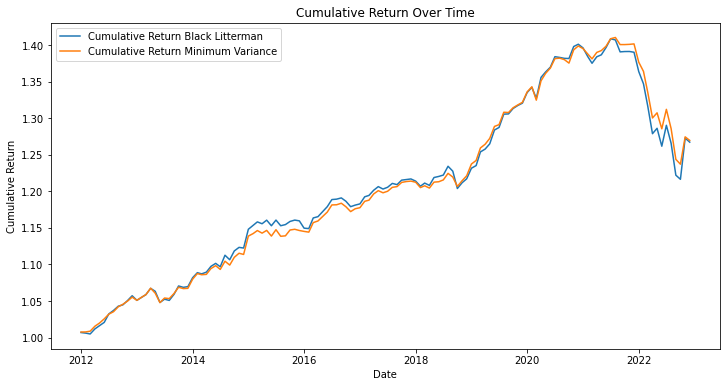

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'Date' column to a datetime type for Black Litterman
portfolio_returns_bl['Date'] = pd.to_datetime(portfolio_returns_bl['Date'])

# Calculate cumulative return for Black Litterman
portfolio_returns_bl['Cumulative_Return'] = (1 + portfolio_returns_bl['Portfolio_Return']).cumprod()

# Convert the 'Date' column to a datetime type for Minimum Variance
portfolio_returns_mv['Date'] = pd.to_datetime(portfolio_returns_mv['Date'])

# Calculate cumulative return for Minimum Variance
portfolio_returns_mv['Cumulative_Return'] = (1 + portfolio_returns_mv['Portfolio_Return']).cumprod()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(portfolio_returns_bl['Date'], portfolio_returns_bl['Cumulative_Return'], label='Cumulative Return Black Litterman')
plt.plot(portfolio_returns_mv['Date'], portfolio_returns_mv['Cumulative_Return'], label='Cumulative Return Minimum Variance')
plt.title('Cumulative Return Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()


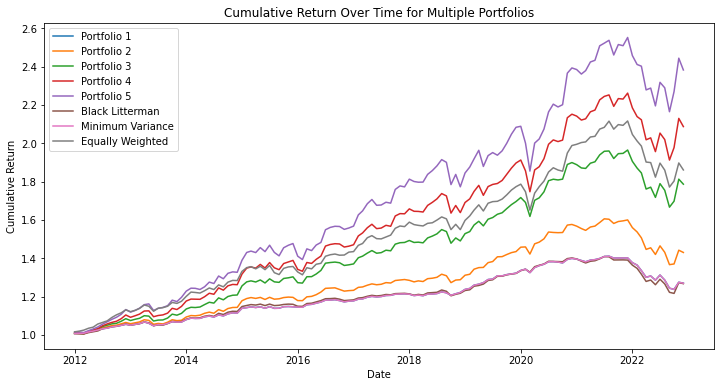

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have seven portfolios: portfolio_returns_1, portfolio_returns_2, ..., portfolio_returns_7

# Convert the 'Date' column to a datetime type for all portfolios
for portfolio_returns, label in zip(
        [portfolio_returns_1, portfolio_returns_2, portfolio_returns_3, portfolio_returns_4, portfolio_returns_5, portfolio_returns_bl, portfolio_returns_mv,portfolio_returns_eq_w],
        ['Portfolio 1', 'Portfolio 2', 'Portfolio 3', 'Portfolio 4', 'Portfolio 5', 'Black Litterman', 'Minimum Variance', 'Equally Weighted']):
    portfolio_returns['Date'] = pd.to_datetime(portfolio_returns['Date'])
    portfolio_returns['Cumulative_Return'] = (1 + portfolio_returns['Portfolio_Return']).cumprod()

# Plotting
plt.figure(figsize=(12, 6))

# Plot cumulative returns for all portfolios
for i, (portfolio_returns, label) in enumerate(zip(
        [portfolio_returns_1, portfolio_returns_2, portfolio_returns_3, portfolio_returns_4, portfolio_returns_5, portfolio_returns_bl, portfolio_returns_mv,portfolio_returns_eq_w],
        ['Portfolio 1', 'Portfolio 2', 'Portfolio 3', 'Portfolio 4', 'Portfolio 5', 'Black Litterman', 'Minimum Variance', 'Equally Weighted'])):
    plt.plot(portfolio_returns['Date'], portfolio_returns['Cumulative_Return'], label=label)

plt.title('Cumulative Return Over Time for Multiple Portfolios')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()


In [51]:
import pandas as pd
import numpy as np

# Assuming you have a risk-free rate, let's say rf_rate
rf_rate = 0.01/12  # Replace this with the actual risk-free rate

# Calculate excess return for Black Litterman portfolio
portfolio_returns_bl['Excess_Return'] = portfolio_returns_bl['Portfolio_Return'] - rf_rate

# Calculate excess return for Minimum Variance portfolio
portfolio_returns_mv['Excess_Return'] = portfolio_returns_mv['Portfolio_Return'] - rf_rate

# Calculate Sharpe ratio for Black Litterman portfolio
sharpe_ratio_bl = portfolio_returns_bl['Excess_Return'].mean() / portfolio_returns_bl['Excess_Return'].std()

# Calculate Sharpe ratio for Minimum Variance portfolio
sharpe_ratio_mv = portfolio_returns_mv['Excess_Return'].mean() / portfolio_returns_mv['Excess_Return'].std()

print(f"Sharpe Ratio (Black Litterman): {sharpe_ratio_bl:.4f}")
print(f"Sharpe Ratio (Minimum Variance): {sharpe_ratio_mv:.4f}")


Sharpe Ratio (Black Litterman): 0.0864
Sharpe Ratio (Minimum Variance): 0.0212


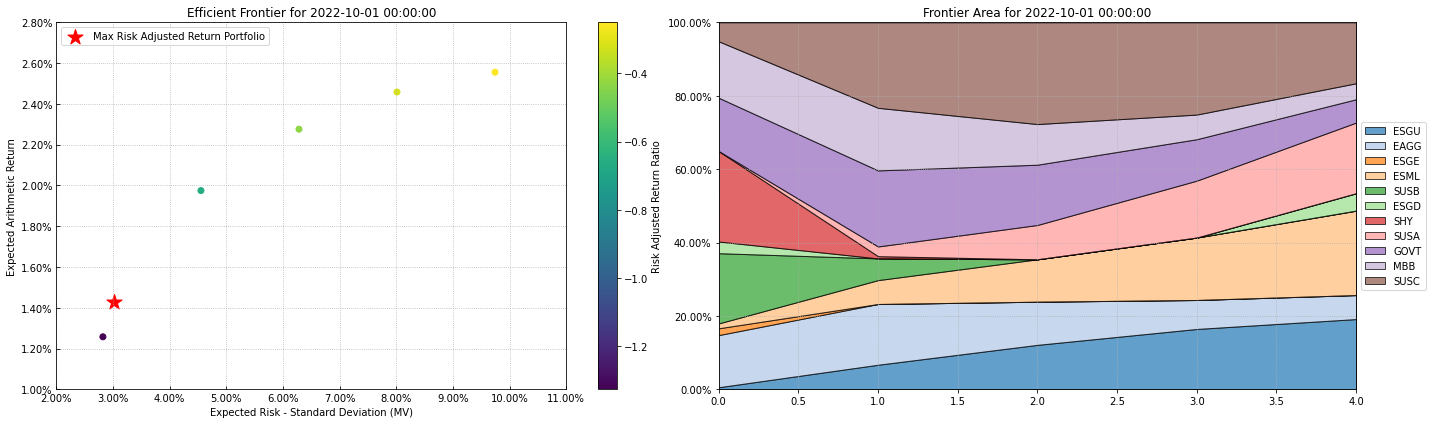

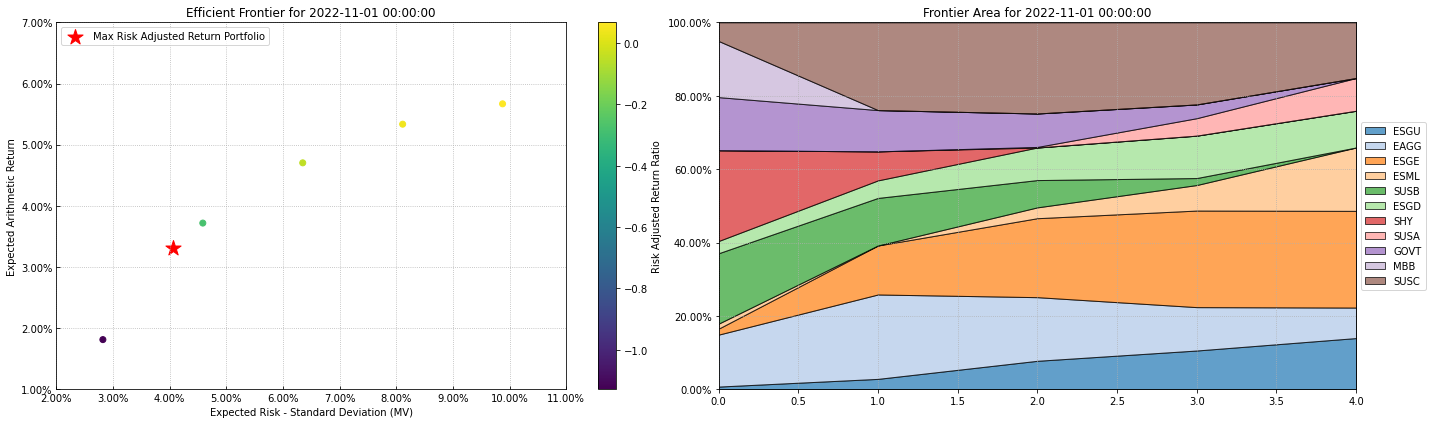

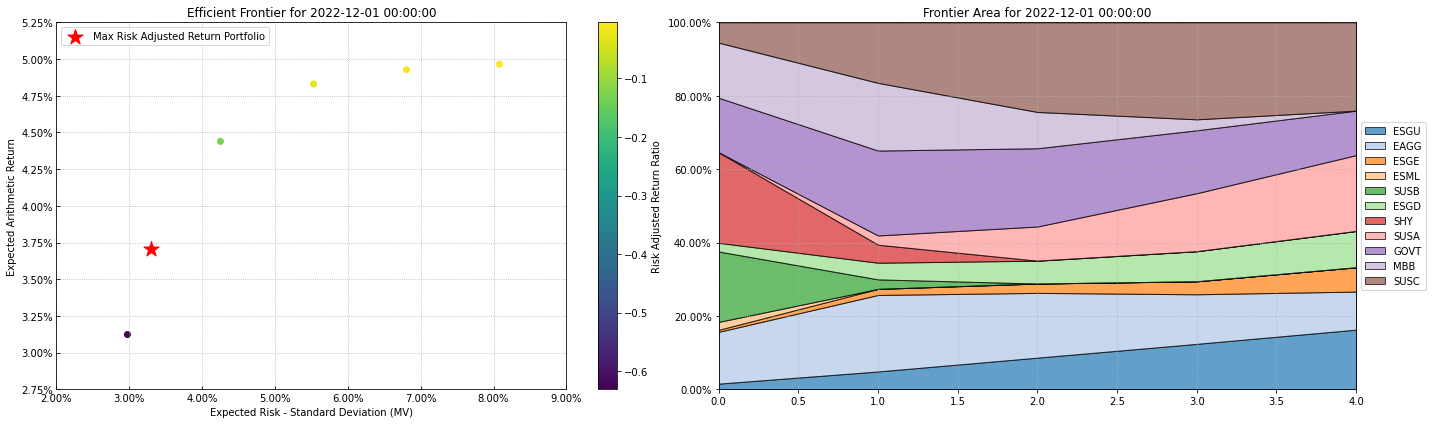

In [55]:
import matplotlib.pyplot as plt

start_date = '2022-10'
end_date = '2022-12'

label = 'Max Risk Adjusted Return Portfolio'  # Title of point
# Convert start_date and end_date to Timestamps
start_date_timestamp = pd.Timestamp(start_date)
end_date_timestamp = pd.Timestamp(end_date)

# Assuming monthly_mu_cov_bl is a list of dictionaries
unique_dates = set()

# Iterate through monthly_mu_cov_bl to get unique dates
unique_mu_cov_bl = []
for entry in monthly_mu_cov_bl:
    date = entry['Date']
    
    # Check if the date is already in the set
    if date not in unique_dates:
        unique_dates.add(date)
        
        # Add the entry to the new list
        unique_mu_cov_bl.append(entry)

# Filter mu and cov from unique_mu_cov_bl based on the start and end dates
filtered_mu_cov = [entry for entry in unique_mu_cov_bl if start_date_timestamp <= entry['Date'] <= end_date_timestamp]

# Iterate through each mu_cov entry and plot the efficient frontier
for mu_cov_entry in filtered_mu_cov:
    date = mu_cov_entry['Date']
    mu = pd.DataFrame(mu_cov_entry['mu_bl'], index=['weights'])
    cov = pd.DataFrame(mu_cov_entry['cov_bl'])
    w_bl = monthly_bl_variance[monthly_bl_variance['Date'] == date].iloc[:, 2:]
    returns = df_imputed_index[
        (df_imputed_index.index.to_timestamp() < date) & (df_imputed_index.index.to_timestamp() >= date - pd.DateOffset(months=108))] - 0.05/12

    # Find the entry in efficient_frontier_dict for the current date
    date_entry = efficient_frontier_dict[date]

    # Extract the points and create a DataFrame
    points = date_entry['Points']
    points_data = []
    for point in points:
        weights = list(point['Weights'].values())
        points_data.append(weights)

    columns = list(point['Weights'].keys())
    points_df = pd.DataFrame(points_data, columns=columns)

    # Create two separate subplots for each iteration
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

    rp.plot_frontier(w_frontier=points_df.T, mu=mu, cov=cov, returns=returns, rm='MV',
                     rf=0.05, alpha=0.1, cmap='viridis', w=w_bl, label=label,
                     marker='*', s=16, c='r', height=6, width=10, ax=ax1, t_factor = 12)
    rp.plot_frontier_area(w_frontier=points_df.T, cmap="tab20", height=6, width=10, ax=ax2)
    
    ax1.set_title(f'Efficient Frontier for {date}')
    ax2.set_title(f'Frontier Area for {date}')
    
    plt.show()


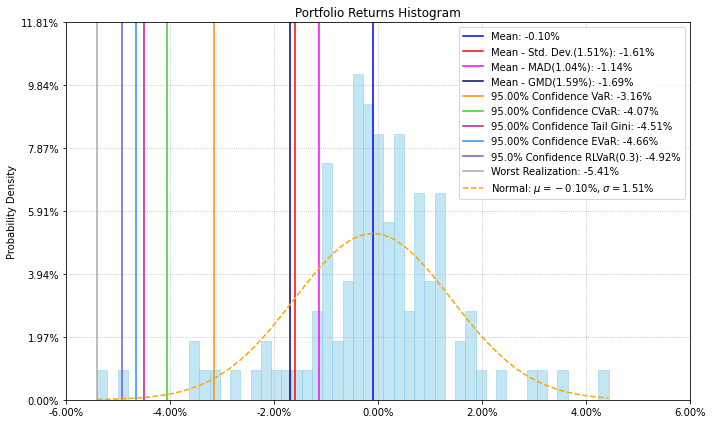

In [28]:
ax = rp.plot_hist(returns=returns,
                  w=pd.DataFrame(points_df.loc[4]),
                  alpha=0.05,
                  bins=50,
                  height=6,
                  width=10,
                  ax=None)